IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import zipfile
import shutil
import os

Import skin-disease-dataset dan scars dataset

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1AeIqYa4e_ksAcUU0Cdp_XF2FhCKgkTtS'

output = 'skin-disease-dataset.zip'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1AeIqYa4e_ksAcUU0Cdp_XF2FhCKgkTtS
To: /content/skin-disease-dataset.zip
100%|██████████| 18.1M/18.1M [00:00<00:00, 68.0MB/s]


'skin-disease-dataset.zip'

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=17VHb2k9eexg87YnlMdNJ3qSd3YaHhfK6'

output = 'scars.zip'

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=17VHb2k9eexg87YnlMdNJ3qSd3YaHhfK6
From (redirected): https://drive.google.com/uc?id=17VHb2k9eexg87YnlMdNJ3qSd3YaHhfK6&confirm=t&uuid=dd6b6d7a-fc75-4fdc-bc67-53811964b6c9
To: /content/scars.zip
100%|██████████| 76.1M/76.1M [00:01<00:00, 53.8MB/s]


'scars.zip'

#DATA PREPROCESSING

In [ ]:
# Extract the archive
DISEASE_ZIP = './skin-disease-dataset.zip'
DISEASE_PATH = './disease'

if os.path.exists(DISEASE_PATH):
    shutil.rmtree(DISEASE_PATH)
zip_ref = zipfile.ZipFile(DISEASE_ZIP, 'r')
zip_ref.extractall(DISEASE_PATH)
zip_ref.close()

SCARS_ZIP = './scars.zip'
SCARS_PATH = './scars'
if os.path.exists(SCARS_PATH):
    shutil.rmtree(SCARS_PATH)

zip_ref = zipfile.ZipFile(SCARS_ZIP, 'r')
zip_ref.extractall(SCARS_PATH)
zip_ref.close()

Distribusi data scars ke dalam folder training-set dan test-set yang ada pada folder skin-disease-dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Paths and Create Directory
SCARS_SOURCE_PATH = './scars/scars'
SCARS_TRAIN_PATH = './disease/skin-disease-dataset/train_set/Luka'
SCARS_TEST_PATH = './disease/skin-disease-dataset/test_set/Luka'
os.makedirs(SCARS_TRAIN_PATH, exist_ok=True)
os.makedirs(SCARS_TEST_PATH, exist_ok=True)

# List Images
scars_images_list = os.listdir(SCARS_SOURCE_PATH)

# Split into training and testing sets (e.g., 80% train, 20% test)
train_images, test_images = train_test_split(scars_images_list, test_size=0.2, random_state=42)
print(f'Train Split Size: {len(train_images)}')
print(f'Test Split Size: {len(test_images)}')

# Move training images to train-set/Luka
for img in train_images:
    src = os.path.join(SCARS_SOURCE_PATH, img)
    dst = os.path.join(SCARS_TRAIN_PATH, img)
    shutil.move(src, dst)

# Move testing images to test-set/Luka
for img in test_images:
    src = os.path.join(SCARS_SOURCE_PATH, img)
    dst = os.path.join(SCARS_TEST_PATH, img)
    shutil.move(src, dst)

print(len(os.listdir(SCARS_SOURCE_PATH)))
print(len(os.listdir(SCARS_TRAIN_PATH)))
print(len(os.listdir(SCARS_TEST_PATH)))

print(f'Train Luka images: {len(os.listdir(SCARS_TRAIN_PATH))}')
print(f'Test Luka images: {len(os.listdir(SCARS_TEST_PATH))}')

Train Split Size: 1393
Test Split Size: 349
0
1393
349
Train Luka images: 1393
Test Luka images: 349


#IMAGE DATA GENERATOR

In [ ]:
  import matplotlib.pyplot as plt
plt.style.use('default')
from scipy import ndimage
from skimage.io import imread
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = './disease/skin-disease-dataset/train_set'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = './disease/skin-disease-dataset/test_set'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=10
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=10
)


#Test set
X_test = []
y_test = []
labels = ['BA- cellulitis','BA-impetigo','FU-athlete-foot','FU-nail-fungus','FU-ringworm','Luka','PA-cutaneous-larva-migrans','VI-chickenpox','VI-shingles']

for i, label in enumerate(labels):
    folder = os.path.join("./disease/skin-disease-dataset/test_set", label)
    files = sorted(os.listdir(folder))
    for k, file in enumerate(files):
        image_path = os.path.join(folder, file)
        image = imread(image_path) / 255.
        image = resize(image, (224, 224))
        X_test.append(image)
        y_test.append(i)

X_test = np.array(X_test)
y_test = np.array(y_test)

#Menampilkan bentuk dari masing-masing set
for image_batch, label_batch in train_generator:
  break
print("Bentuk array dari dataset train (pelatihan) adalah:", image_batch.shape,label_batch.shape)
for image_batch, label_batch in validation_generator:
  break
print("Bentuk array dari dataset validation (validasi) adalah:", image_batch.shape,label_batch.shape)
print("Bentuk array dari dataset test (pengujian) adalah:", X_test.shape,y_test.shape)


# Check if there are any images from 'Luka'
luka_indices = [i for i, label in enumerate(y_test) if labels[label] == 'Luka']
print(f'Number of Luka images in X_test: {len(luka_indices)}')


Found 2317 images belonging to 9 classes.
Found 582 images belonging to 9 classes.
Bentuk array dari dataset train (pelatihan) adalah: (10, 224, 224, 3) (10, 9)
Bentuk array dari dataset validation (validasi) adalah: (10, 224, 224, 3) (10, 9)
Bentuk array dari dataset test (pengujian) adalah: (583, 224, 224, 3) (583,)
Number of Luka images in X_test: 349


In [ ]:
print (train_generator.class_indices)

labels_txt = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
  f.write(labels_txt)

{'BA- cellulitis': 0, 'BA-impetigo': 1, 'FU-athlete-foot': 2, 'FU-nail-fungus': 3, 'FU-ringworm': 4, 'Luka': 5, 'PA-cutaneous-larva-migrans': 6, 'VI-chickenpox': 7, 'VI-shingles': 8}


USING TRANSFER LEARNING MOBILENETV2

In [ ]:
IMG_SHAPE = (224, 224, 3)

base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE,
                                              include_top=False,
                                              weights='imagenet')

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['acc'])

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if logs.get('val_loss')<0.001:
          self.model.stop_training = True
callback2 = myCallback()

In [ ]:
from collections import Counter
counter = Counter(train_generator.classes)
max_val = float(max(counter.values()))
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}

In [ ]:
history = model.fit(train_generator,
                    epochs=15,
                    class_weight=class_weights,
                    callbacks=[learning_rate_reduction, callback, callback2],
                    validation_data=validation_generator)

Epoch 1/15
232/232 [==============================] - ETA: 0s - loss: 6.4514 - acc: 0.6910
Epoch 1: saving model to best_model.h5
232/232 [==============================] - 44s 168ms/step - loss: 6.4514 - acc: 0.6910 - val_loss: 0.3896 - val_acc: 0.8866 - lr: 0.0010
Epoch 2/15
232/232 [==============================] - ETA: 0s - loss: 2.7376 - acc: 0.8934
Epoch 2: saving model to best_model.h5
232/232 [==============================] - 48s 205ms/step - loss: 2.7376 - acc: 0.8934 - val_loss: 0.2823 - val_acc: 0.9141 - lr: 0.0010
Epoch 3/15
232/232 [==============================] - ETA: 0s - loss: 1.8933 - acc: 0.9210
Epoch 3: saving model to best_model.h5
232/232 [==============================] - 47s 204ms/step - loss: 1.8933 - acc: 0.9210 - val_loss: 0.2447 - val_acc: 0.9192 - lr: 0.0010
Epoch 4/15
232/232 [==============================] - ETA: 0s - loss: 1.5271 - acc: 0.9448
Epoch 4: saving model to best_model.h5
232/232 [==============================] - 35s 152ms/step - loss: 1.5

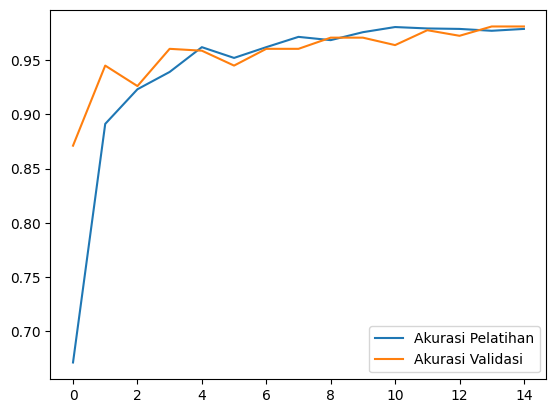

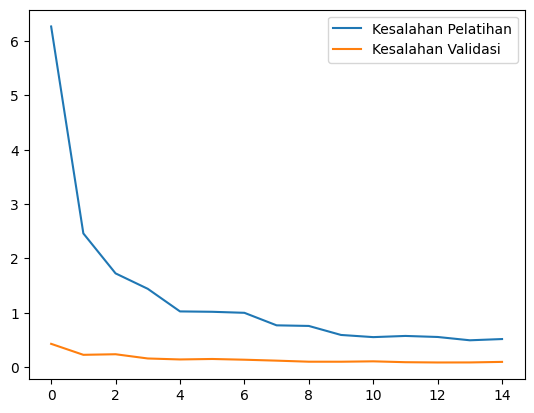

In [ ]:
plt.plot(history.history["acc"],label="Akurasi Pelatihan")
plt.plot(history.history["val_acc"],label="Akurasi Validasi")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="Kesalahan Pelatihan")
plt.plot(history.history["val_loss"],label="Kesalahan Validasi")
plt.legend()
plt.show()

In [ ]:
import keras

model = keras.models.load_model('best_model.h5')

Evaluasi

In [ ]:
import keras
from keras.utils import to_categorical

# Assuming y_test is already defined
y_test2 = to_categorical(y_test)
X_test3, y_test3 = (X_test, y_test2)


In [ ]:
#coba
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 6 6 

In [ ]:
#Memeriksa matriks model
print(model.metrics_names)
#Evaluasi data training
print(model.evaluate(train_generator))
#Evaluasi validasi data
print(model.evaluate(validation_generator))
#Evaluasi data test
print(model.evaluate(x= X_test3, y = y_test3))

['loss', 'acc']
232/232 [==============================] - 43s 185ms/step - loss: 0.0400 - acc: 0.9909
[0.039974652230739594, 0.9909365773200989]
59/59 [==============================] - 3s 43ms/step - loss: 0.0748 - acc: 0.9794
[0.07481054216623306, 0.9793814420700073]
19/19 [==============================] - 2s 44ms/step - loss: 0.0723 - acc: 0.9811
[0.07229028642177582, 0.9811320900917053]


Demo Prediksi Penyakit Kulit

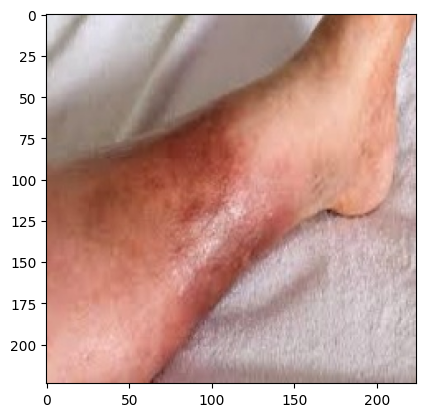

Label yang benar adalah: 0 : BA- cellulitis
1/1 [==============================] - 1s 1s/step
Nilai yang diprediksi adalah: [9.8844689e-01 8.0876225e-06 9.2004873e-03 3.7842357e-04 2.3721726e-05
 5.6854719e-06 1.9170790e-03 9.2853898e-06 1.0252106e-05]
Label yang diprediksi adalah: 0 : BA- cellulitis
Prediksi benar


In [ ]:
n = 26 #Jangan melampaui jumlah gambar test sebanyak 583 gambar (nilai dari gambar test - 1)

plt.imshow(X_test[n])
plt.show()

true_label = np.argmax(y_test2,axis=1)[n]
print("Label yang benar adalah:",true_label,":",labels[true_label])
prediction = model.predict(X_test[n][np.newaxis,...])[0]
print("Nilai yang diprediksi adalah:",prediction)
predicted_label = np.argmax(prediction)
print("Label yang diprediksi adalah:",predicted_label,":",labels[predicted_label])

if true_label == predicted_label:
    print("Prediksi benar")
else:
    print("Prediksi salah")

In [ ]:
import cv2

img = cv2.imread('scar1_0_104.jpeg')
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

classes = model.predict(img)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
print(classes)

#STOP

Run semua gambar dalam test-data

In [ ]:
import matplotlib.pyplot as plt

# Loop melalui nilai dari 0 hingga panjang X_test
for n in range(len(X_test)):
    plt.imshow(X_test[n])
    plt.show()

    true_label = y_test[n]
    print("Label yang benar adalah:", true_label, ":", labels[true_label])

    prediction = model.predict(X_test[n][np.newaxis, ...])[0]
    print("Nilai yang diprediksi adalah:", prediction)

    predicted_label = np.argmax(prediction)
    print("Label yang diprediksi adalah:", predicted_label, ":", labels[predicted_label])

    if true_label == predicted_label:
        print("Prediksi benar")
    else:
        print("Prediksi salah")



CONVERT TO JS

In [ ]:
!pip install tensorflowjs
#RESTART RUNTIME AFTER INSTALL THIS MODULE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 22.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
     

In [ ]:
import time
saved_model_path = "./{}.h5".format(int(time.time()))

model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

/bin/bash: line 1: tensorflowjs_converter: command not found


In [ ]:
#After you run the Jupyter Notebook, you will end up with a single JSON file named model.json and a .bin file named group1-shard1of1.bin

In [ ]:
# compress necessary files for grading
!zip submission.zip *.bin model.json

	zip warning: name not matched: *.bin
	zip warning: name not matched: model.json

zip error: Nothing to do! (submission.zip)


In [ ]:
# Simpan arsitektur model ke dalam file JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Simpan bobot model ke dalam file HDF5
model.save_weights("model.h5")

print("Model telah disimpan ke dalam file model.json dan model.h5")


Model telah disimpan ke dalam file model.json dan model.h5
